44608 Week 5 Project
Author: Scott Williamson
Date: 06/03/24
Purpose: Demonstate skills with Jupyter and EDA 

In [98]:
## Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [99]:
# Load dataset into DataFrame
df = sns.load_dataset('penguins')


# Inspect first rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [100]:
## Initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [101]:
## Print Descriptive Statistics
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


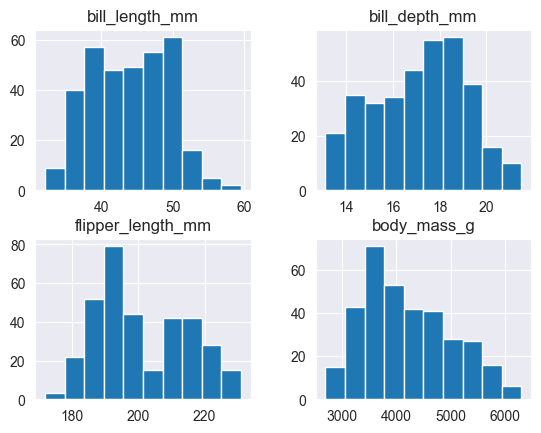

In [102]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

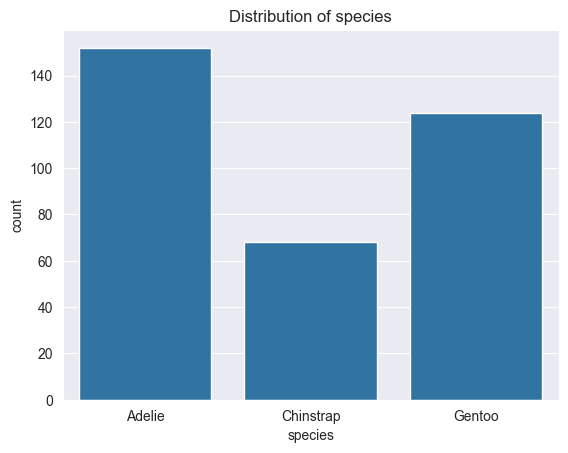

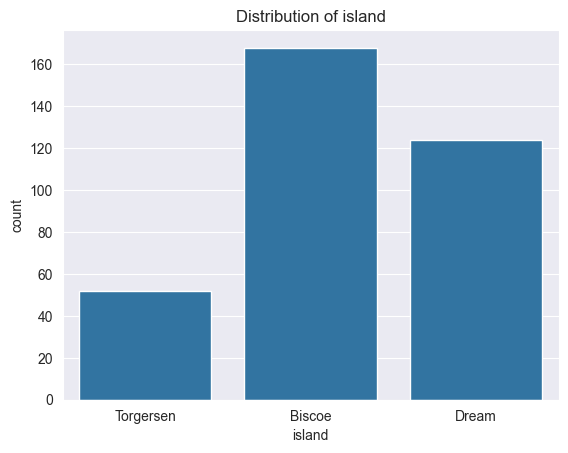

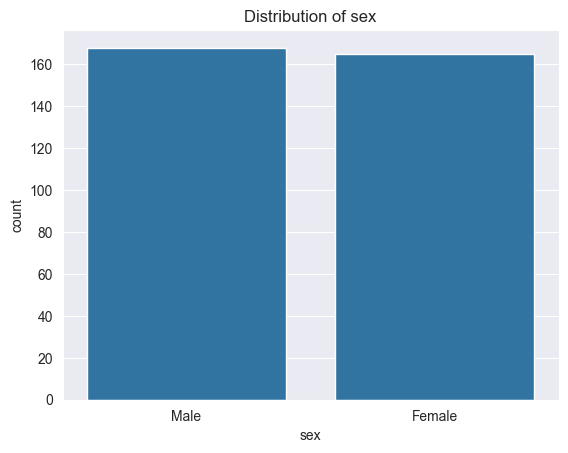

In [103]:
# Inspect value counts by categorical column
df['species'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.set_style('darkgrid')
    sns.countplot(x=col, data=df, )
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

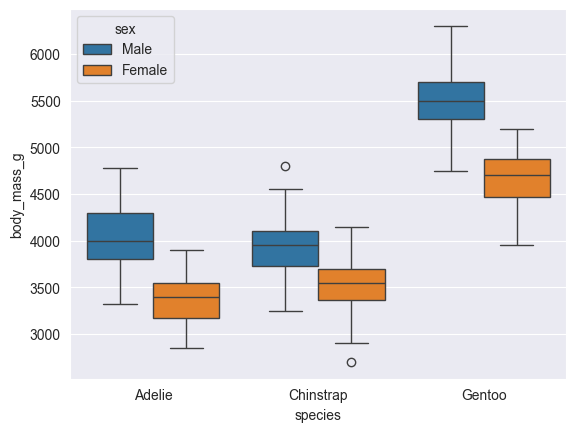

In [104]:
#Characteristics of species vs sex
sns.boxplot(x=df.species,y=df.body_mass_g,hue=df.sex)

plt.show()

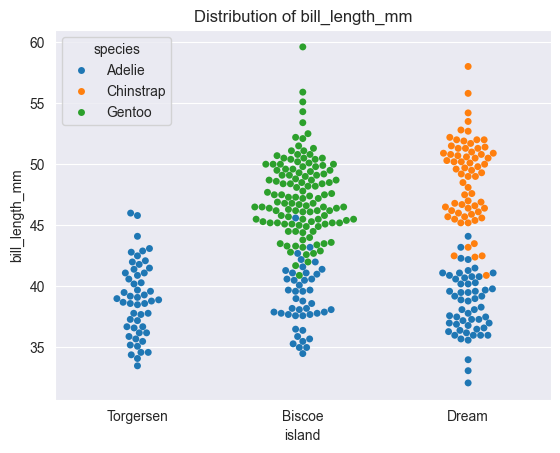

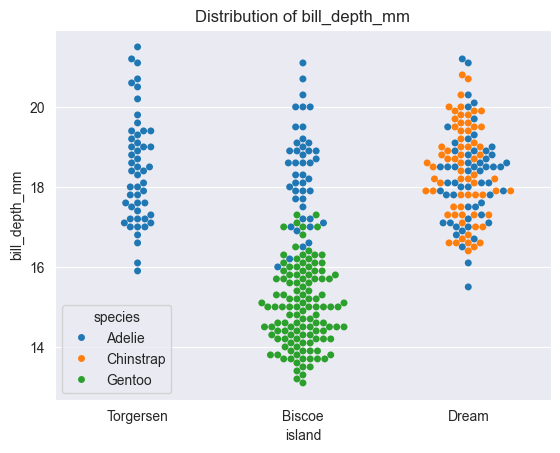

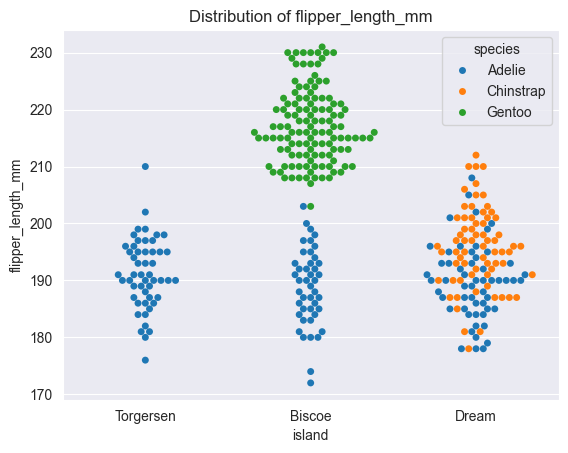

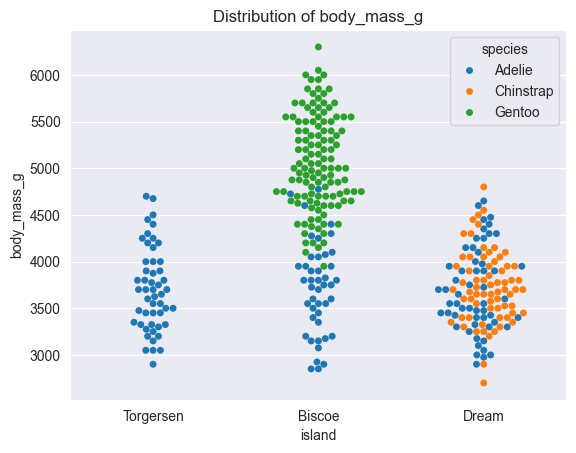

In [105]:

#Characteristics of species vs island
#sns.swarmplot(x=df.island,y=df.body_mass_g,hue=df.species)

for col in df.select_dtypes(include=['float64', 'category']).columns:
    # Display count plot
    sns.swarmplot(y=col,x=df.island, data=df, hue=df.species)
    plt.title(f'Distribution of {col}')
    plt.show()

In [106]:
correlation_matrix=df.select_dtypes(include=['number']).corr()

correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

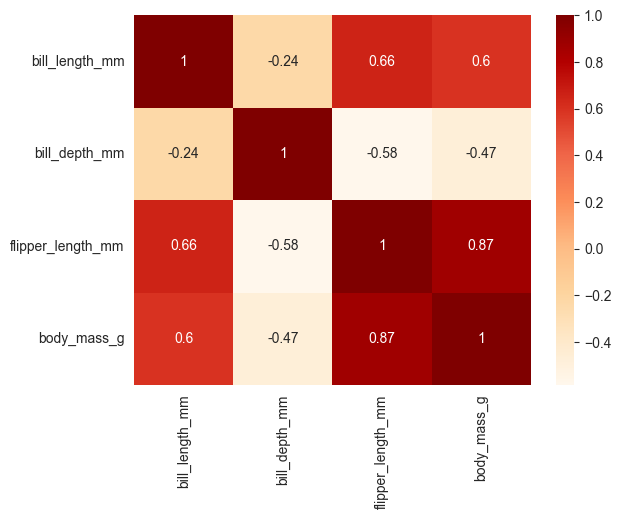

In [107]:
sns.heatmap(correlation_matrix,annot=True, cmap="OrRd")

## Not very useful
create more useful correlations

<Axes: >

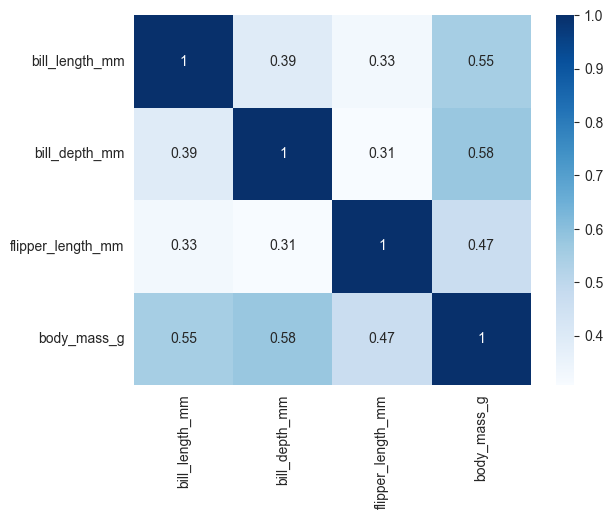

In [108]:
#Create new datasets for each species
df_adelie=df[df['species']=='Adelie']
df_gentoo=df[df['species']=='Gentoo']
df_chinstrap=df[df['species']=='Chinstrap']


adelie_correlation_matrix=df_adelie.select_dtypes(include=['number']).corr()

adelie_correlation_matrix

sns.heatmap(adelie_correlation_matrix,annot=True, cmap="Blues")

<Axes: >

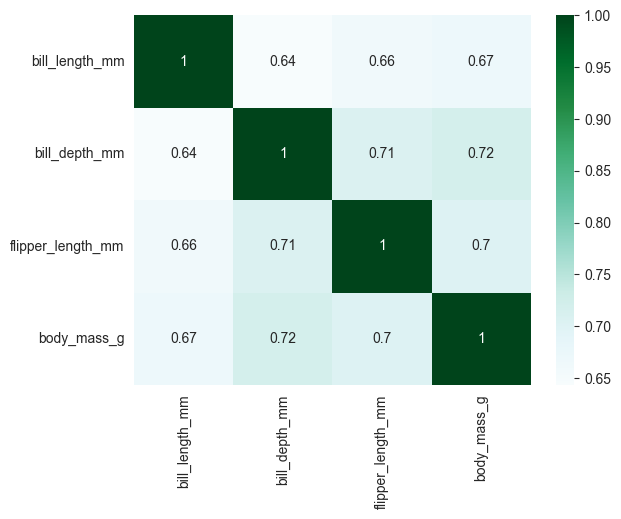

In [109]:

gentoo_correlation_matrix=df_gentoo.select_dtypes(include=['number']).corr()

gentoo_correlation_matrix

sns.heatmap(gentoo_correlation_matrix,annot=True, cmap="BuGn")


<Axes: >

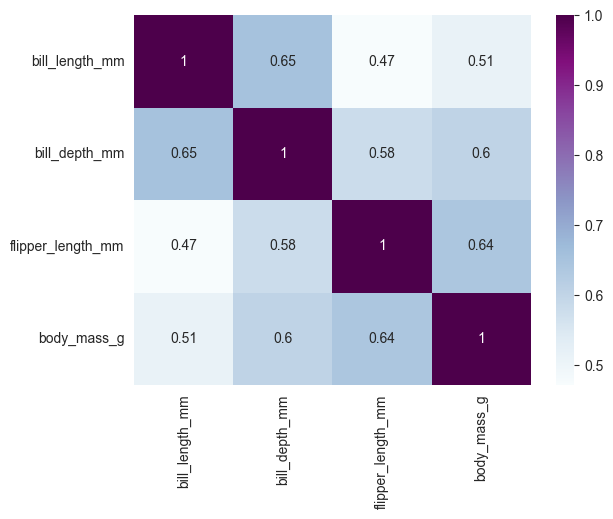

In [110]:
chinstrap_correlation_matrix=df_chinstrap.select_dtypes(include=['number']).corr()

chinstrap_correlation_matrix

sns.heatmap(chinstrap_correlation_matrix,annot=True, cmap="BuPu")

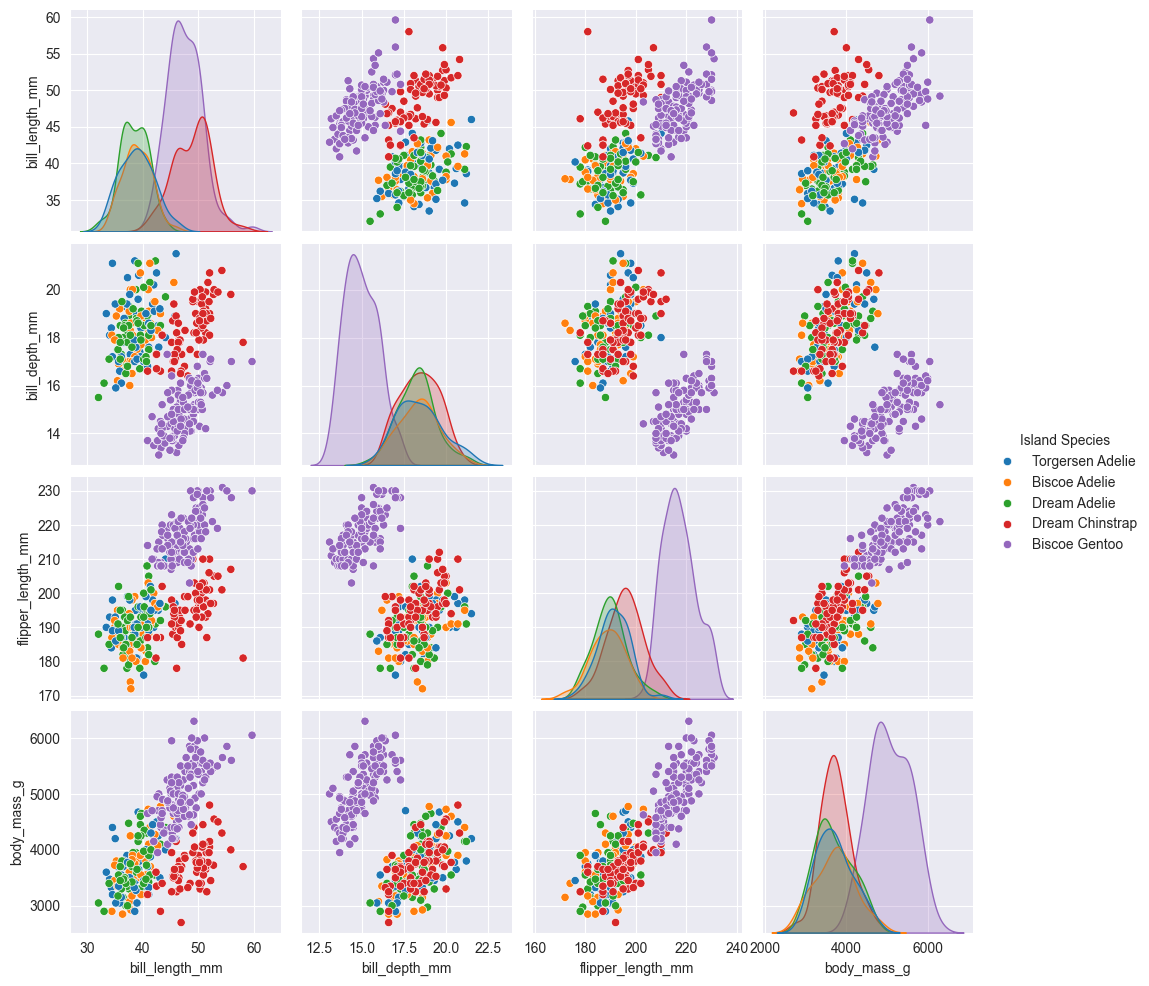

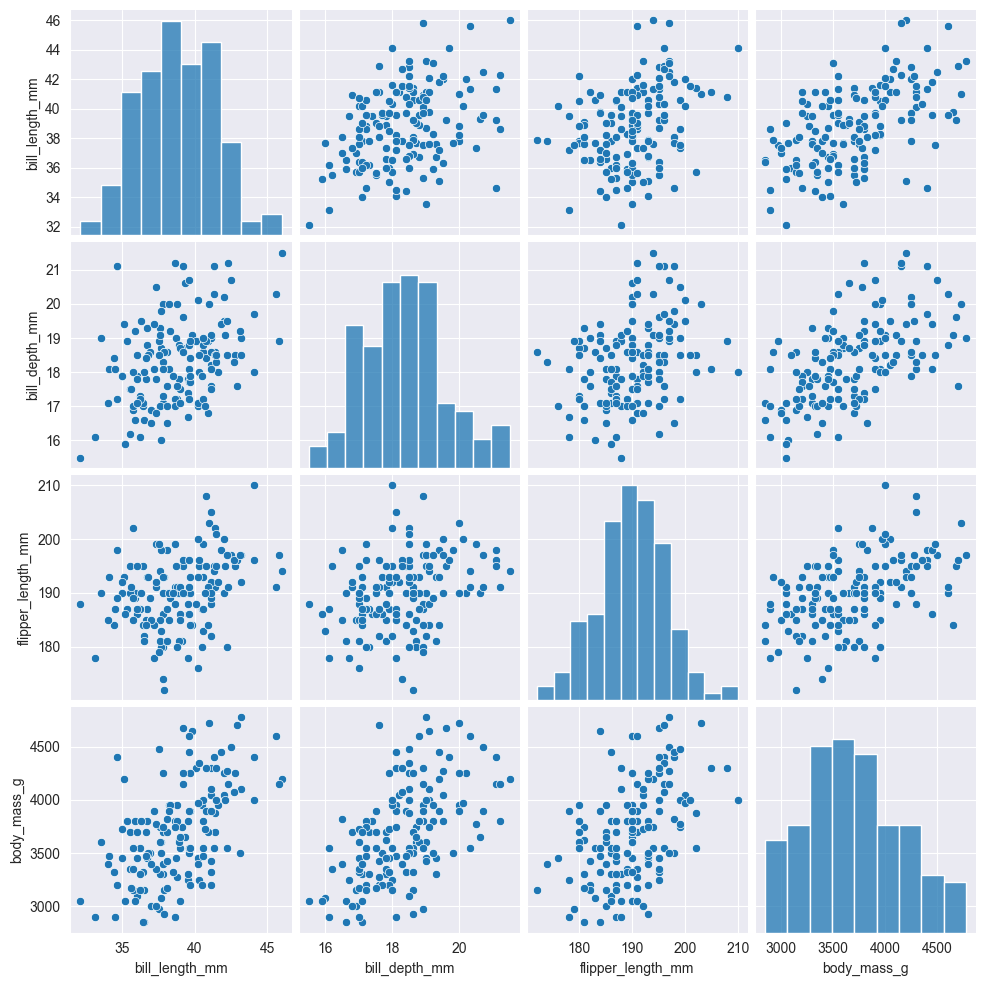

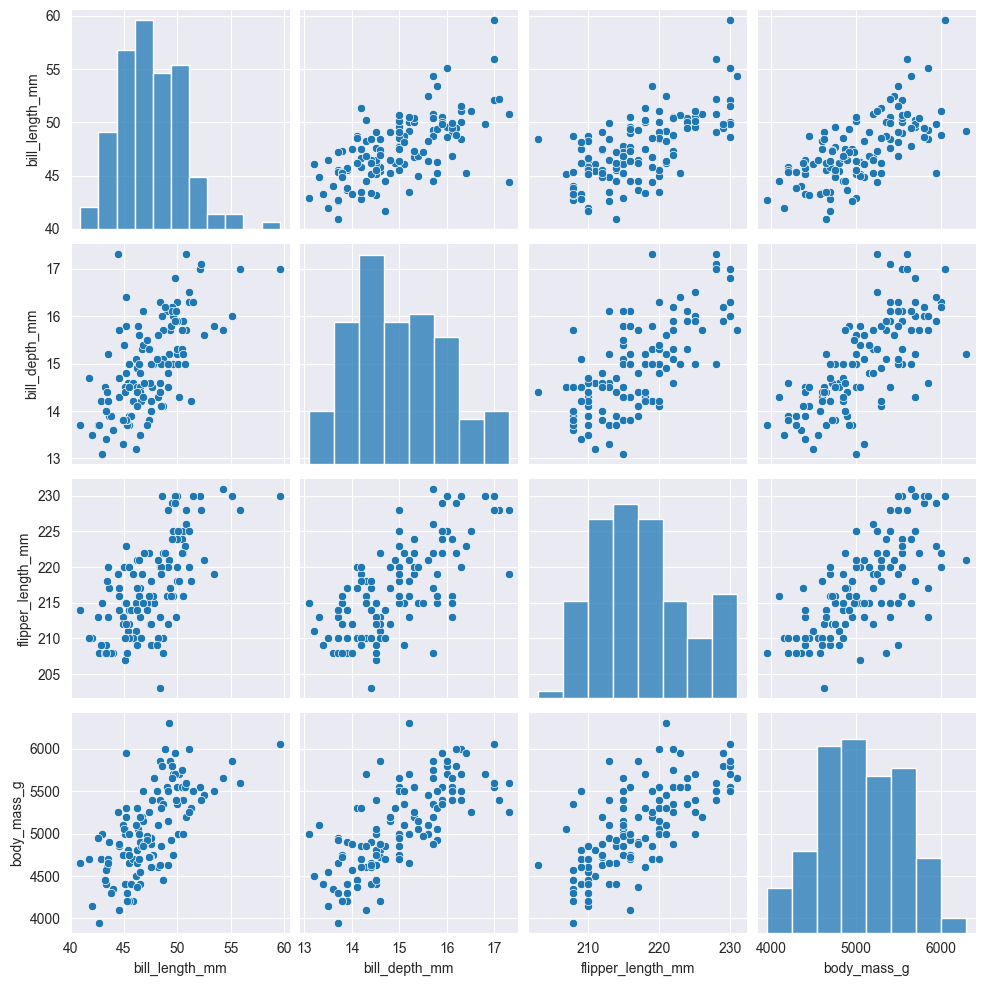

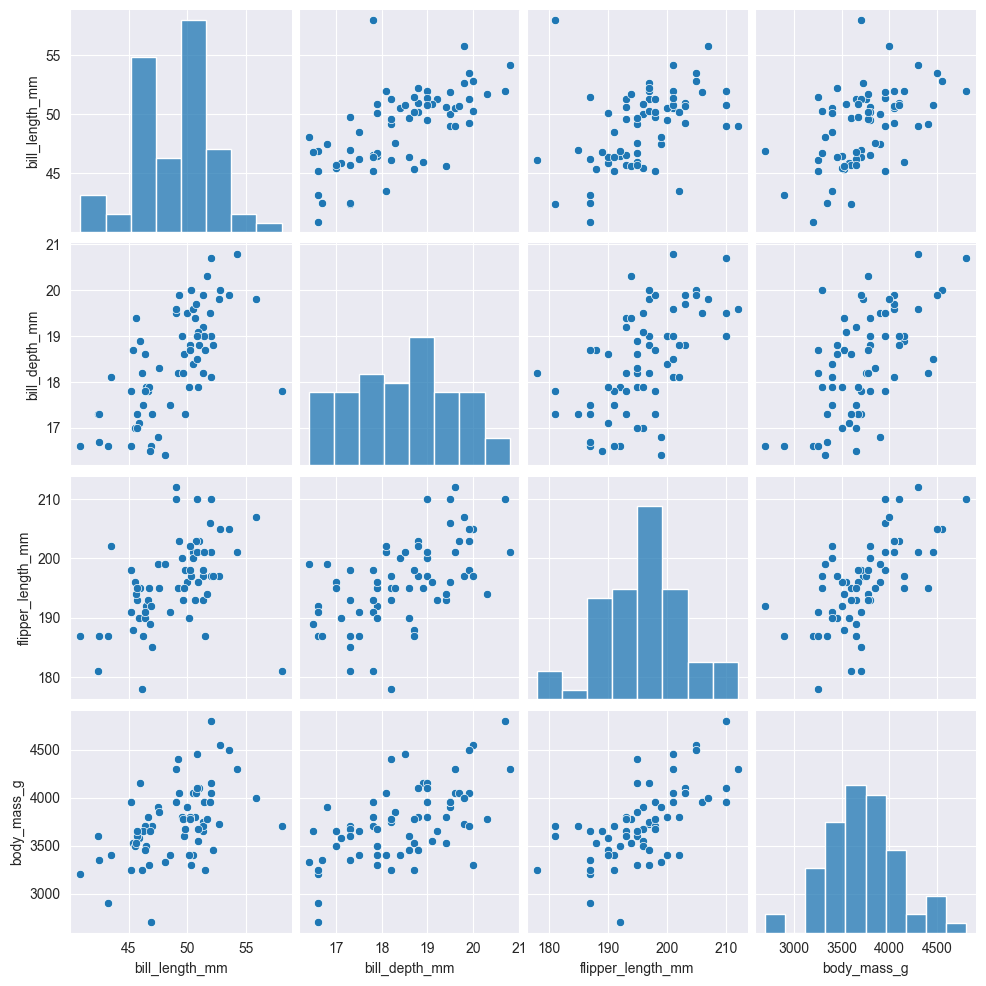

In [113]:
df['Island Species'] = df['island'].map(str) + ' ' + df['species'].map(str)
# Initial Visualizations
sns.pairplot(df,hue='Island Species')
sns.pairplot(df_adelie)
sns.pairplot(df_gentoo)
sns.pairplot(df_chinstrap)
# Other Visualizations
plt.show()